In [15]:
import torch
import requests
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

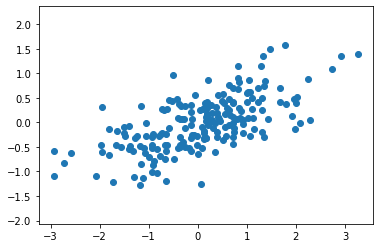

In [16]:
z = torch.randn(200, 2)

cov = torch.tensor([[1,0.2], [0.2, 0.5]])

z = z @ cov

plt.scatter(z[:,0], z[:,1])
plt.axis("equal")

plt.show()

In [17]:
def findPC(z):
    dim = z.shape[1]
    w = torch.randn(dim)
    w = w / ((w ** 2).sum() ** 0.5)

    lr = 0.1

    for epoch in range(101):
        w.requires_grad_(True)
        var = ((z @ w.view(-1,1)) ** 2).mean()
        var.backward()

        with torch.no_grad():
            w = w + lr * w.grad
            w = w / ((w ** 2).sum() ** 0.5)
            
    return w, var.item()

In [18]:
def PCA2(z, n):
    w_set = []
    v_set = []

    for _ in range(n):
        w, var = findPC(z)
        w_set.append(w)
        v_set.append(var)
        z = z - (z @ w.view(-1,1)) * w
    
    return w_set, v_set

In [19]:
def transform(z, w_set):
    return z @ torch.stack(w_set).T

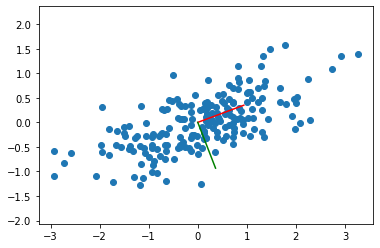

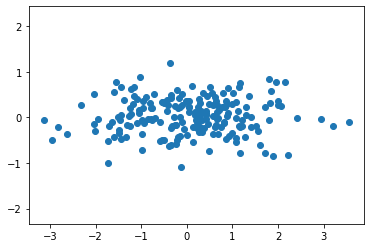

In [20]:
w_set, v_set = PCA2(z, 2)

plt.scatter(z[:,0], z[:,1])
plt.plot([0, w_set[0][0]], [0, w_set[0][1]], 'r') # PC1
plt.plot([0, w_set[1][0]], [0, w_set[1][1]], 'g') # PC2

plt.axis('equal')
plt.show()

zt = transform(z, w_set)
plt.scatter(zt[:,0], zt[:,1])

plt.axis('equal')
plt.show()

In [21]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
with open('iris.data', 'wb') as f:
    f.write(r.content)

vectors = []
answers = []

for line in open('iris.data', 'r'):
    try:
        items = line.strip().split(",")
        vectors.append([float(i) for i in items[:4]])
        answers.append(items[4])
    except:
        pass

print(vectors)
print(answers)
species = {a: i for i, a in enumerate(set(answers))}
species

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

{'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2}

In [22]:
x = torch.tensor(vectors)
z = x - x.mean(dim = 0)

In [24]:
w_set, v_set = PCA2(z, 4)

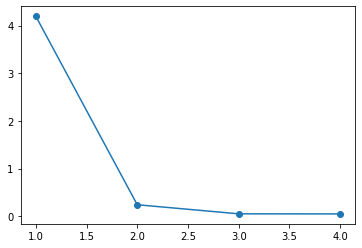

In [25]:
plt.plot(range(1,5), v_set, '-o')
plt.show()

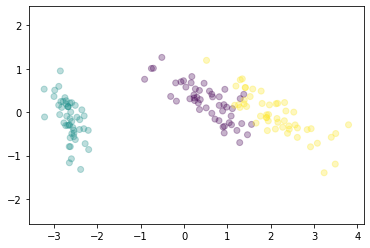

In [26]:
zt = transform(z, w_set)

plt.scatter(zt[:, 0], zt[:, 1], c = [species[s] for s in answers], alpha=0.3)

plt.axis('equal')
plt.show()

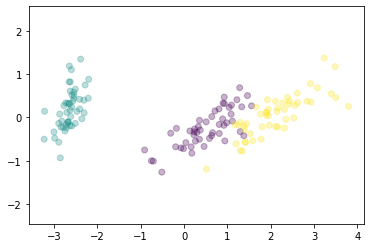

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [38]:
pca = PCA(n_components = 2)
zt2 = pca.fit_transform(x)

plt.scatter(zt2[:, 0], zt2[:, 1], c = [species[s] for s in answers], alpha=0.3)

plt.axis('equal')
plt.show()